# Stellar Classification EDA
## Content
The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
alpha = Right Ascension angle (at J2000 epoch)
delta = Declination angle (at J2000 epoch)
u = Ultraviolet filter in the photometric system
g = Green filter in the photometric system
r = Red filter in the photometric system
i = Near Infrared filter in the photometric system
z = Infrared filter in the photometric system
run_ID = Run Number used to identify the specific scan
rereun_ID = Rerun Number to specify how the image was processed
cam_col = Camera column to identify the scanline within the run
field_ID = Field number to identify each field
spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
class = object class (galaxy, star or quasar object)
redshift = redshift value based on the increase in wavelength
plate = plate ID, identifies each plate in SDSS
MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

## Artykuł o klasyfikacji
https://www.urania.edu.pl/wiadomosci/polacy-badaja-gwiazdy-galaktyki-i-kwazary-z-przegladu-wise-1

Satelita WISE odkrył setki milionów nowych kosmicznych źródeł w podczerwieni. Ich wiarygodna klasyfikacja jest jednak wciąż sporym wyzwaniem. Zwykła identyfikacja w oparciu o barwy obiektów często nie wystarcza – do osiągnięcia zadowalającego poziomu kompletności otrzymywanych próbek danego typu źródeł niezbędne są bardziej zaawansowane metody ich klasyfikacji. Polscy astronomowie z Uniwersytetu Jagiellońskiego i innych ośrodków badawczych opracowują nowe, zautomatyzowane algorytmy klasyfikacji źródeł podczerwonych z obejmującego całe niebo przeglądu WISE.

Automatyczna klasyfikacja oparta została na algorytmach tak zwanego nadzorowanego uczenia maszynowego (ang. supervised machine learning). Wymaga ona dostarczenia specjalnej „próbki treningowej”, złożonej z obiektów niebieskich o znanej już wcześniej, pewnej klasyfikacji. W opisywanych badaniach wykorzystano w tym celu dane spektroskopowe z przeglądu Sloan Digital Sky Server – SDSS (DR10).

## Klasy

*Kwazar* (z ang. quasar – quasi-stellar radio source lub też QSO – quasi-stellar object, dosłownie „obiekt gwiazdopodobny emitujący fale radiowe”) – zwarte źródło ciągłego promieniowania elektromagnetycznego o ogromnej mocy, pozornie przypominające gwiazdę. W rzeczywistości jest to rodzaj aktywnej galaktyki

*Gwiazda* – kuliste ciało niebieskie, stanowiące skupisko powiązanej grawitacyjnie materii. Przynajmniej przez część swojego istnienia emituje w sposób stabilny promieniowanie elektromagnetyczne (w szczególności światło widzialne)

*Galaktyka* (z gr. γάλα, gála – mleko) – duży, grawitacyjnie związany układ gwiazd, pyłu i gazu międzygwiazdowego oraz niewidocznej ciemnej materii. Typowa galaktyka zawiera od 107 do 1012 gwiazd orbitujących wokół wspólnego środka masy.

## Cel biznesowy

Automatyczne klasyfikowanie nowych obserwacji niebieskich obiektów, co umożliwia skierowanie uwagi na obiekty najbardziej wartościowe z naukowego punktu widzenia, takie jak nowe rodzaje galaktyk lub obiekty o wysokim czerwonym przesunięciu. Oznacza to skupienie się na odróżnieniu galaktyk i kwazarów od gwiazd.

In [22]:
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from astropy.time import Time

In [3]:
from matplotlib import style

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid", palette="magma")
style.use('ggplot')

In [4]:
df = pd.read_csv('star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [5]:
df.shape

(100000, 18)

In [23]:
min_date = df['MJD'].min()
max_date = df['MJD'].max()
mjd_values = (min_date, max_date)

# Convert MJD to normal date
for mjd in mjd_values:
    time = Time(mjd, format='mjd')
    print(f"MJD {mjd} corresponds to {time.iso}")

MJD 51608 corresponds to 2000-03-05 00:00:00.000
MJD 58932 corresponds to 2020-03-24 00:00:00.000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [12]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


# split

In [21]:
X = df.drop('class', axis=1)
y = df['class']

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_dev.to_csv('X_dev.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_dev.to_csv('y_dev.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [12]:
X_dev.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,7.000000e+04,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.000000,70000.000000,7.000000e+04,70000.000000,70000.000000,70000.000000,70000.000000
mean,1.237665e+18,177.523255,24.163923,22.082706,20.629675,19.644730,19.083297,18.767809,4475.298643,301.0,3.509143,185.262000,5.778293e+18,0.577053,5132.045343,55584.372429,448.900843
std,8.428366e+12,96.281956,19.664663,2.252924,2.036557,1.855468,1.758271,1.766249,1962.391312,0.0,1.589684,148.259882,3.328308e+18,0.731514,2956.114949,1809.840797,272.534831
min,1.237646e+18,0.005528,-18.785328,12.101680,10.498200,9.822070,9.469903,9.612333,109.000000,301.0,1.000000,11.000000,2.995801e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.697927,5.237441,20.352330,18.963078,18.130263,17.725317,17.448853,3184.000000,301.0,2.000000,82.000000,2.839630e+18,0.054144,2522.000000,54233.000000,221.000000
50%,1.237663e+18,180.586442,23.677042,22.177385,21.095200,20.125290,19.405405,19.003310,4188.000000,301.0,4.000000,146.000000,5.605929e+18,0.423060,4979.000000,55866.000000,432.000000
75%,1.237668e+18,233.674287,39.944393,23.692470,22.122820,21.041280,20.397130,19.922982,5326.000000,301.0,5.000000,239.000000,8.327271e+18,0.704742,7396.000000,56776.000000,644.000000
max,1.237681e+18,359.999031,82.816030,32.781390,30.607000,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [18]:
df['class'] = df['class'].astype('category')
df['class'].head()

0    GALAXY
1    GALAXY
2    GALAXY
3    GALAXY
4    GALAXY
Name: class, dtype: category
Categories (3, object): ['GALAXY', 'QSO', 'STAR']

### Univariate analysis

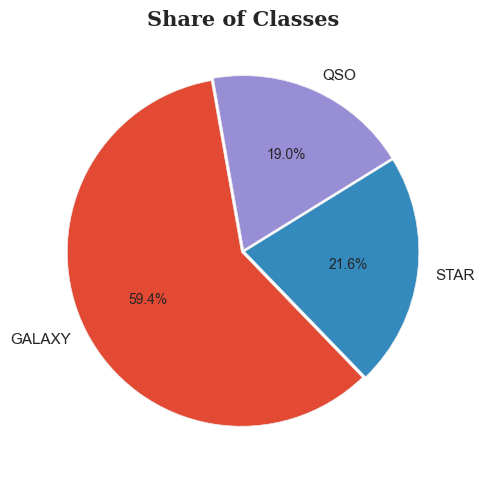

In [21]:
plt.figure(figsize=(5, 5))
df['class'].value_counts().plot.pie(explode=[0.01, 0.01, 0.01], autopct='%1.1f%%', shadow=False, startangle=100)
plt.title('Share of Classes', fontsize=15, fontfamily='serif', fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

We are working with an imbalanced dataset. The majority class is galaxy, followed by star and quasar.

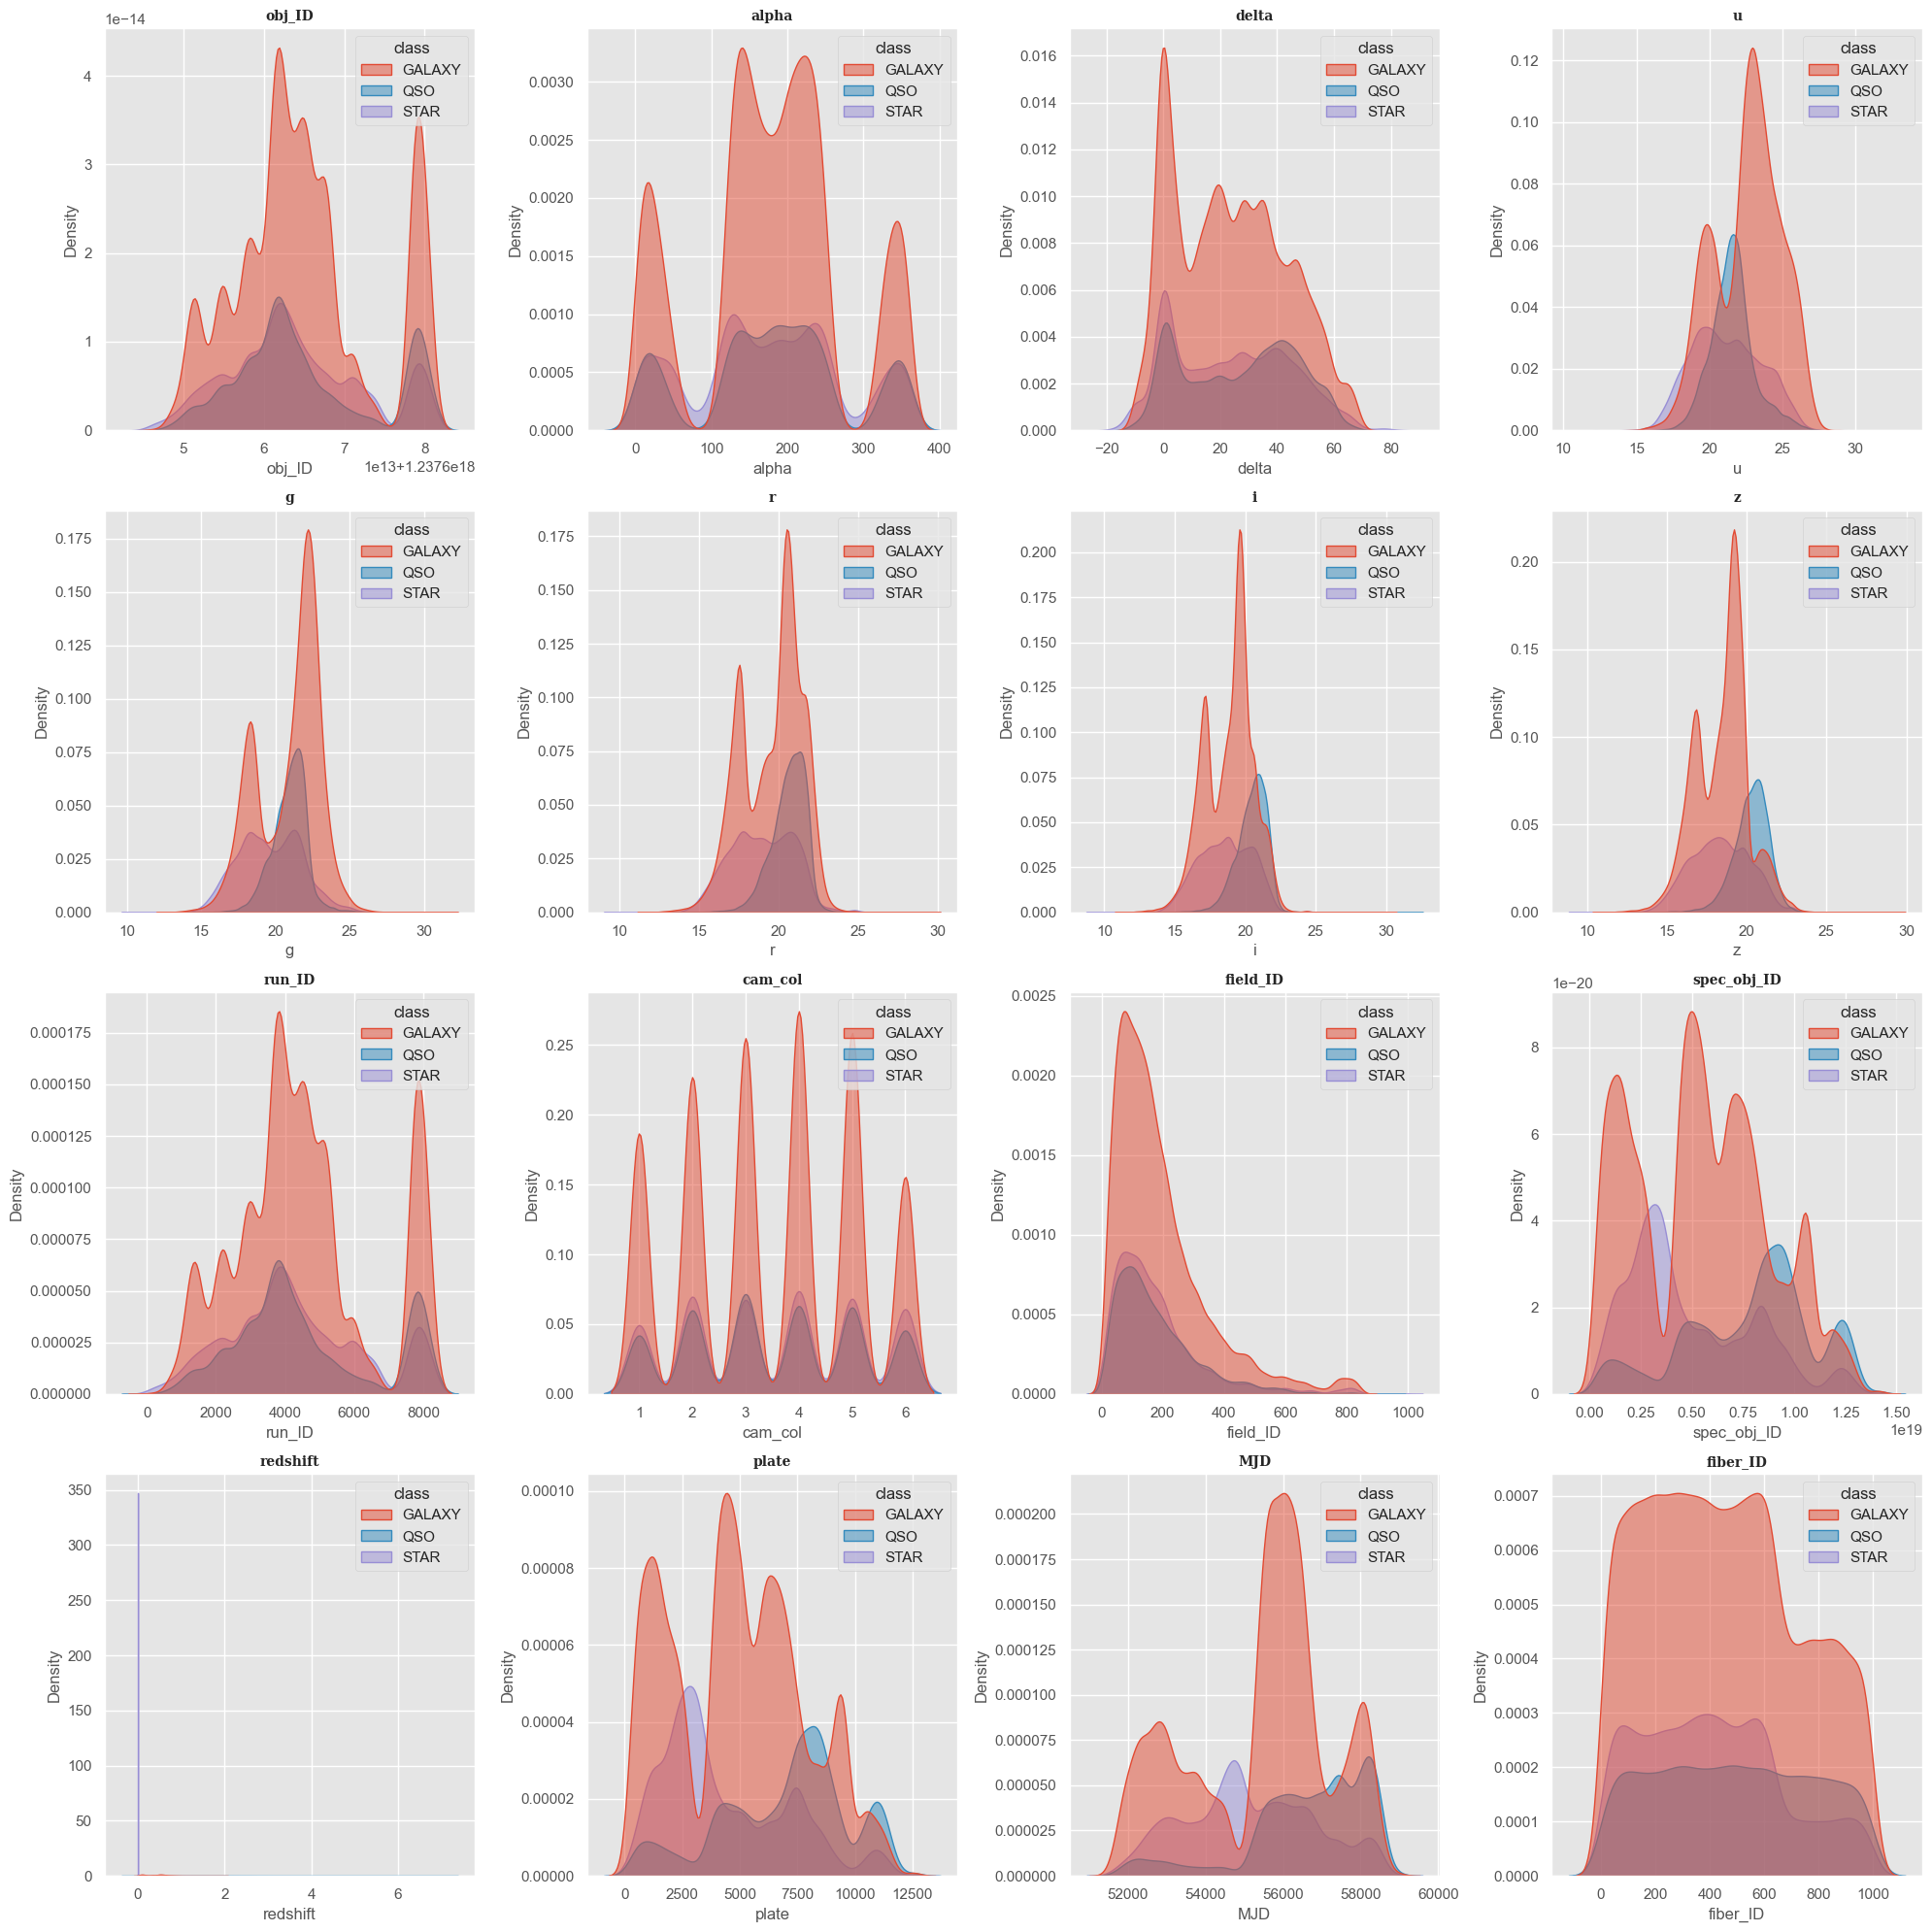

In [22]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(df.drop(columns=['class']).columns,
                        start=1):
        plt.subplot(4, 4, i)
        sns.kdeplot(df, x = col,  fill=True, alpha=0.5, linewidth=1, hue='class')
        plt.title(col, fontsize=10, fontfamily='serif', fontweight='bold')
        plt.tight_layout()
plt.show()

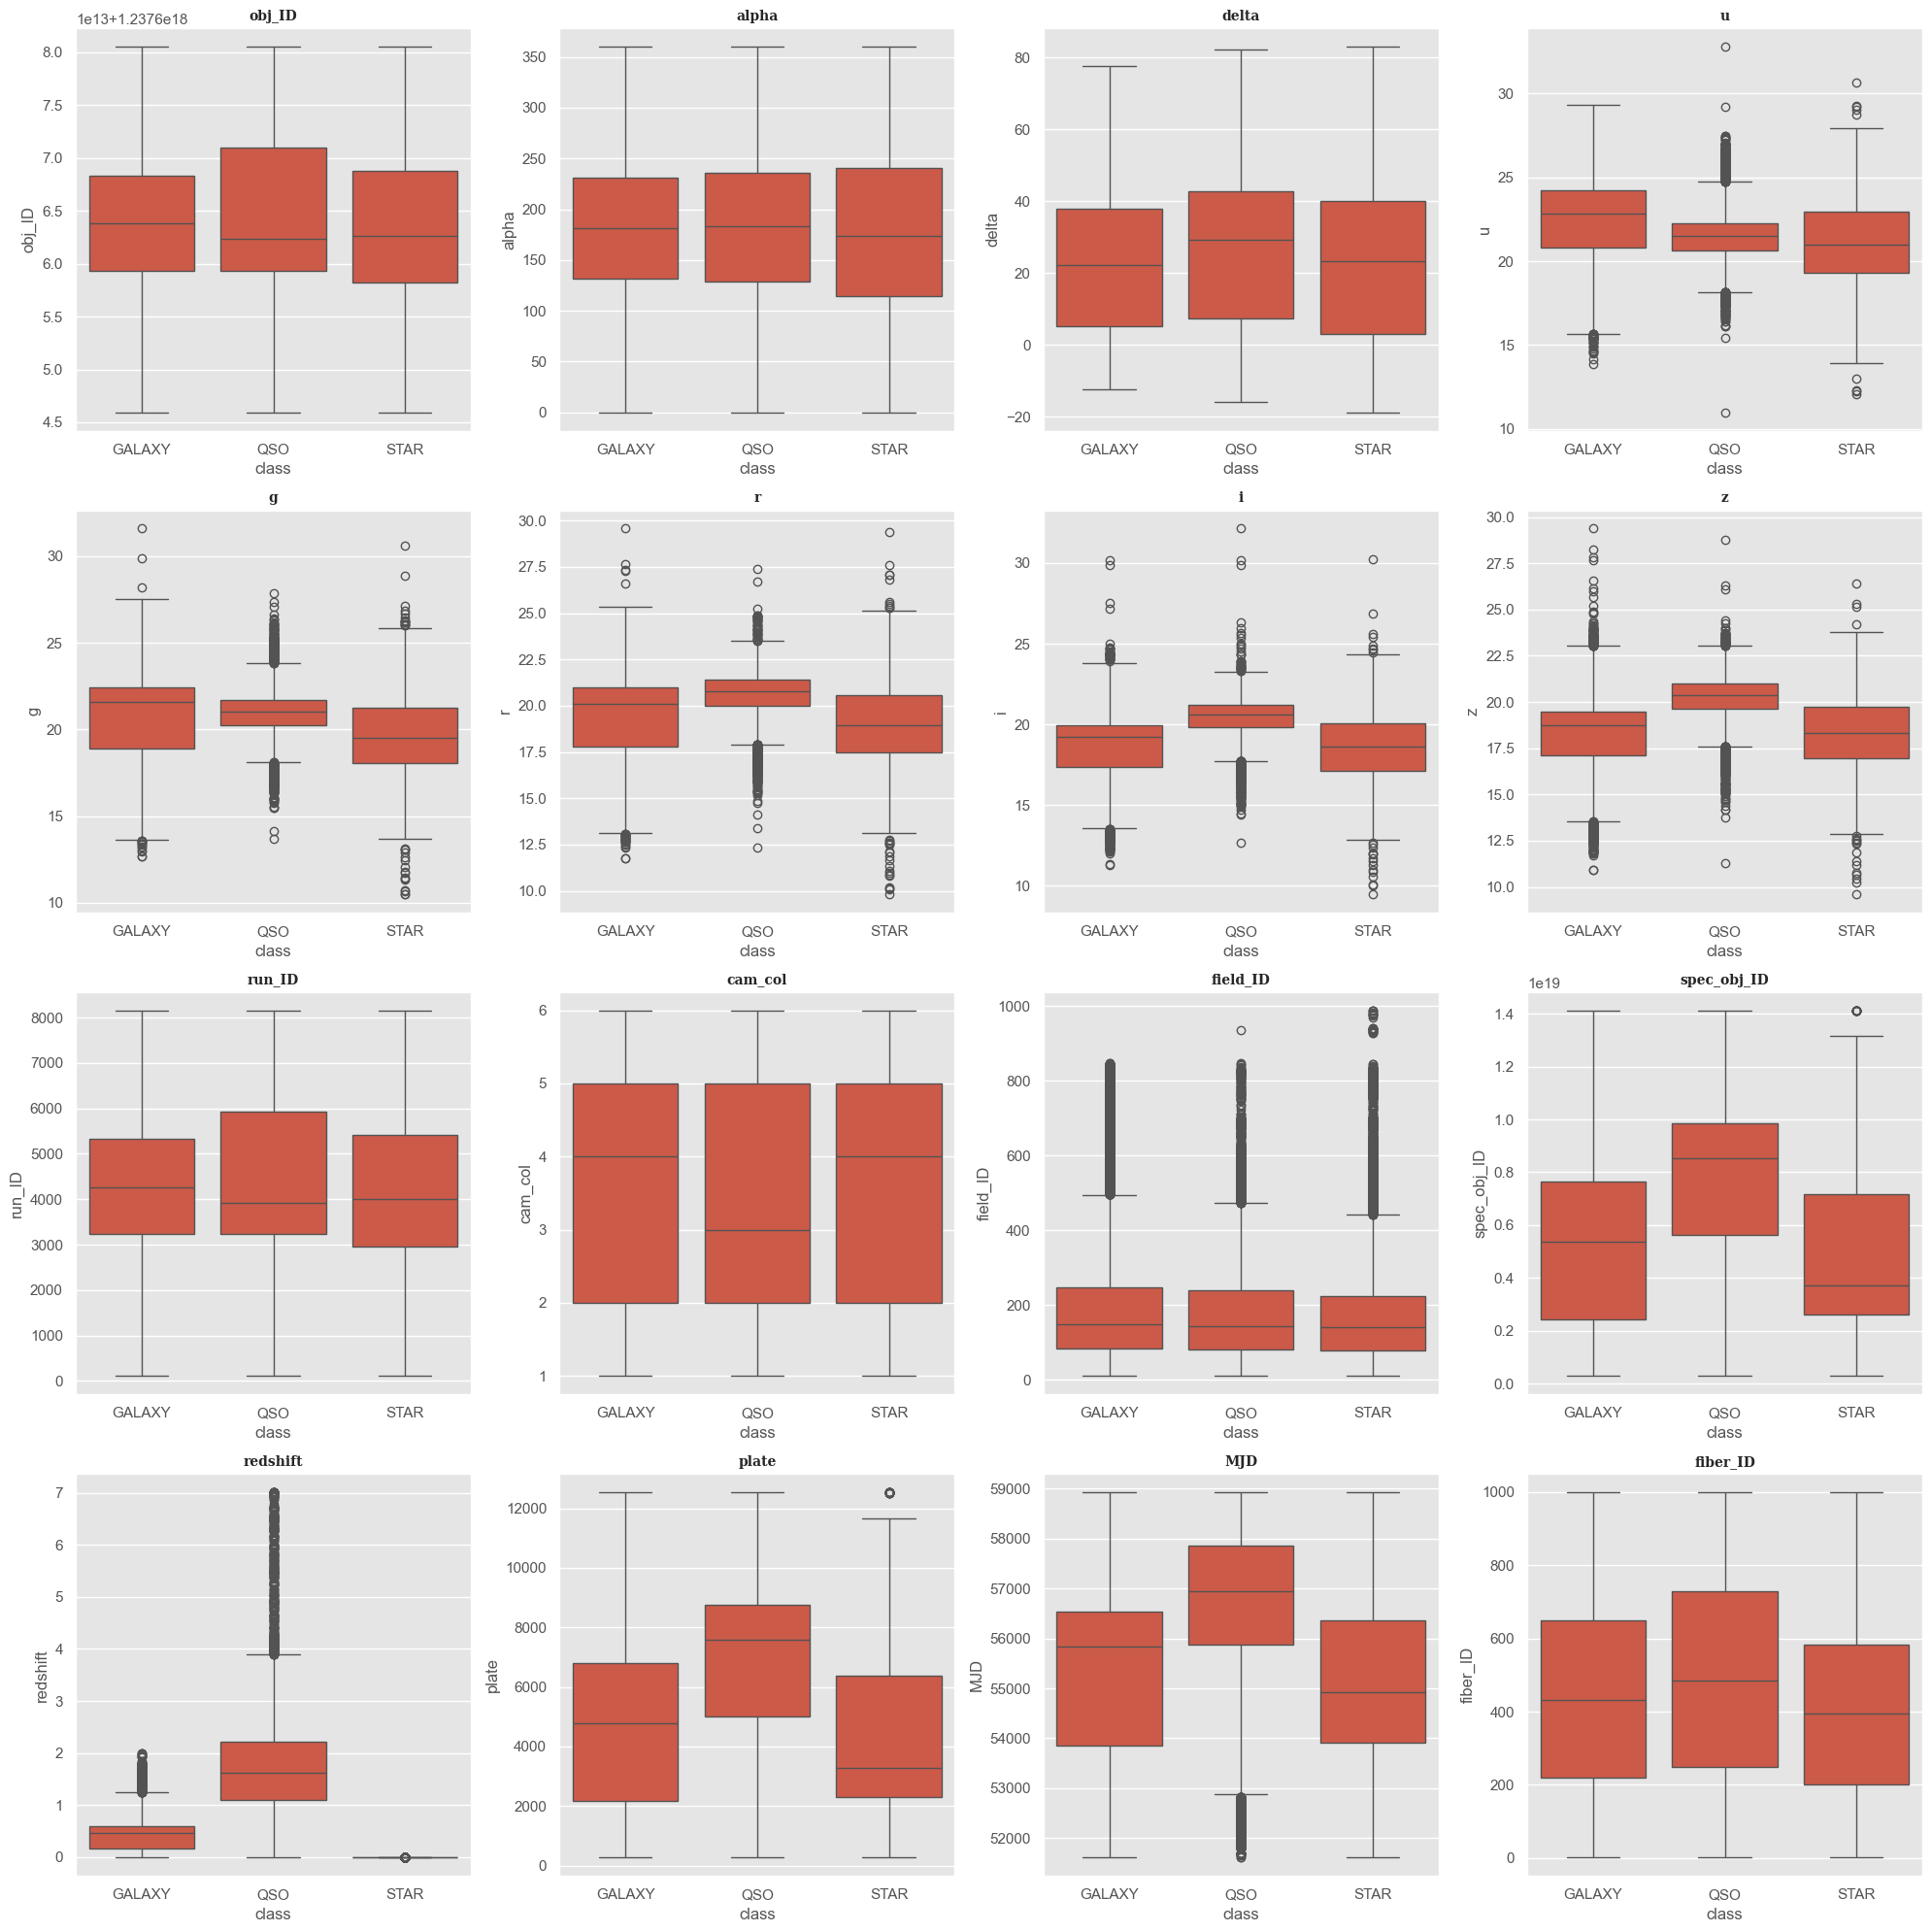

In [23]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(df.drop(columns=['class']).columns,
                        start=1):
        plt.subplot(4, 4, i)
        sns.boxplot(data=df, x='class', y=col)
        plt.title(col, fontsize=10, fontfamily='serif', fontweight='bold')
        plt.tight_layout()
plt.show()

redshift??

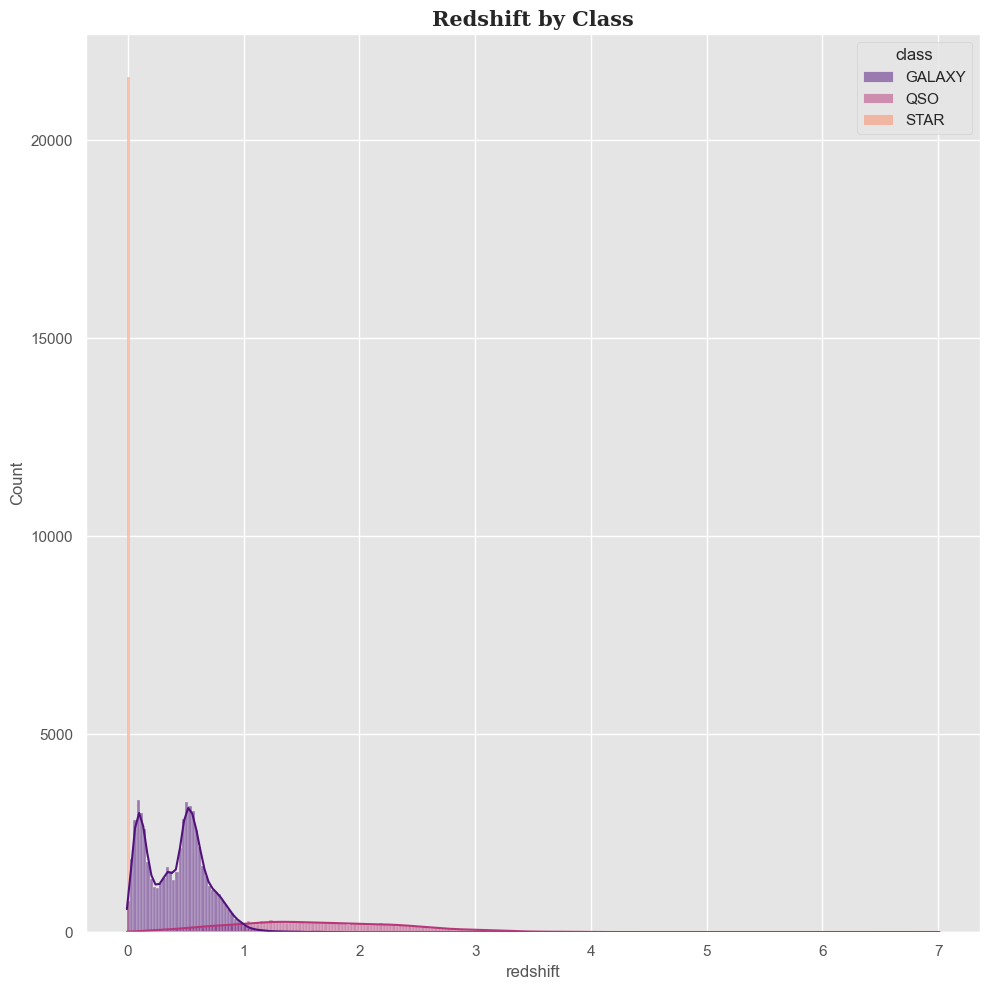

In [24]:
plt.figure(figsize=(10, 10))
sns.histplot(data=df, x='redshift', hue='class', kde=True, palette='magma')
plt.title('Redshift by Class', fontsize=15, fontfamily='serif', fontweight='bold')
plt.tight_layout()
plt.show()

All stars have redshift = 0 ??

In [25]:
df.loc[df['class'] == 'STAR']['redshift'].agg(['min', 'max'])

min   -0.004136
max    0.004153
Name: redshift, dtype: float64

In [26]:
df.groupby('class')['redshift'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
class,,,,
GALAXY,-0.009971,1.995524,0.421596,0.456274
QSO,0.000461,7.011245,1.719676,1.617232
STAR,-0.004136,0.004153,-0.000115,-0.000076


### Mulitvariate analysis

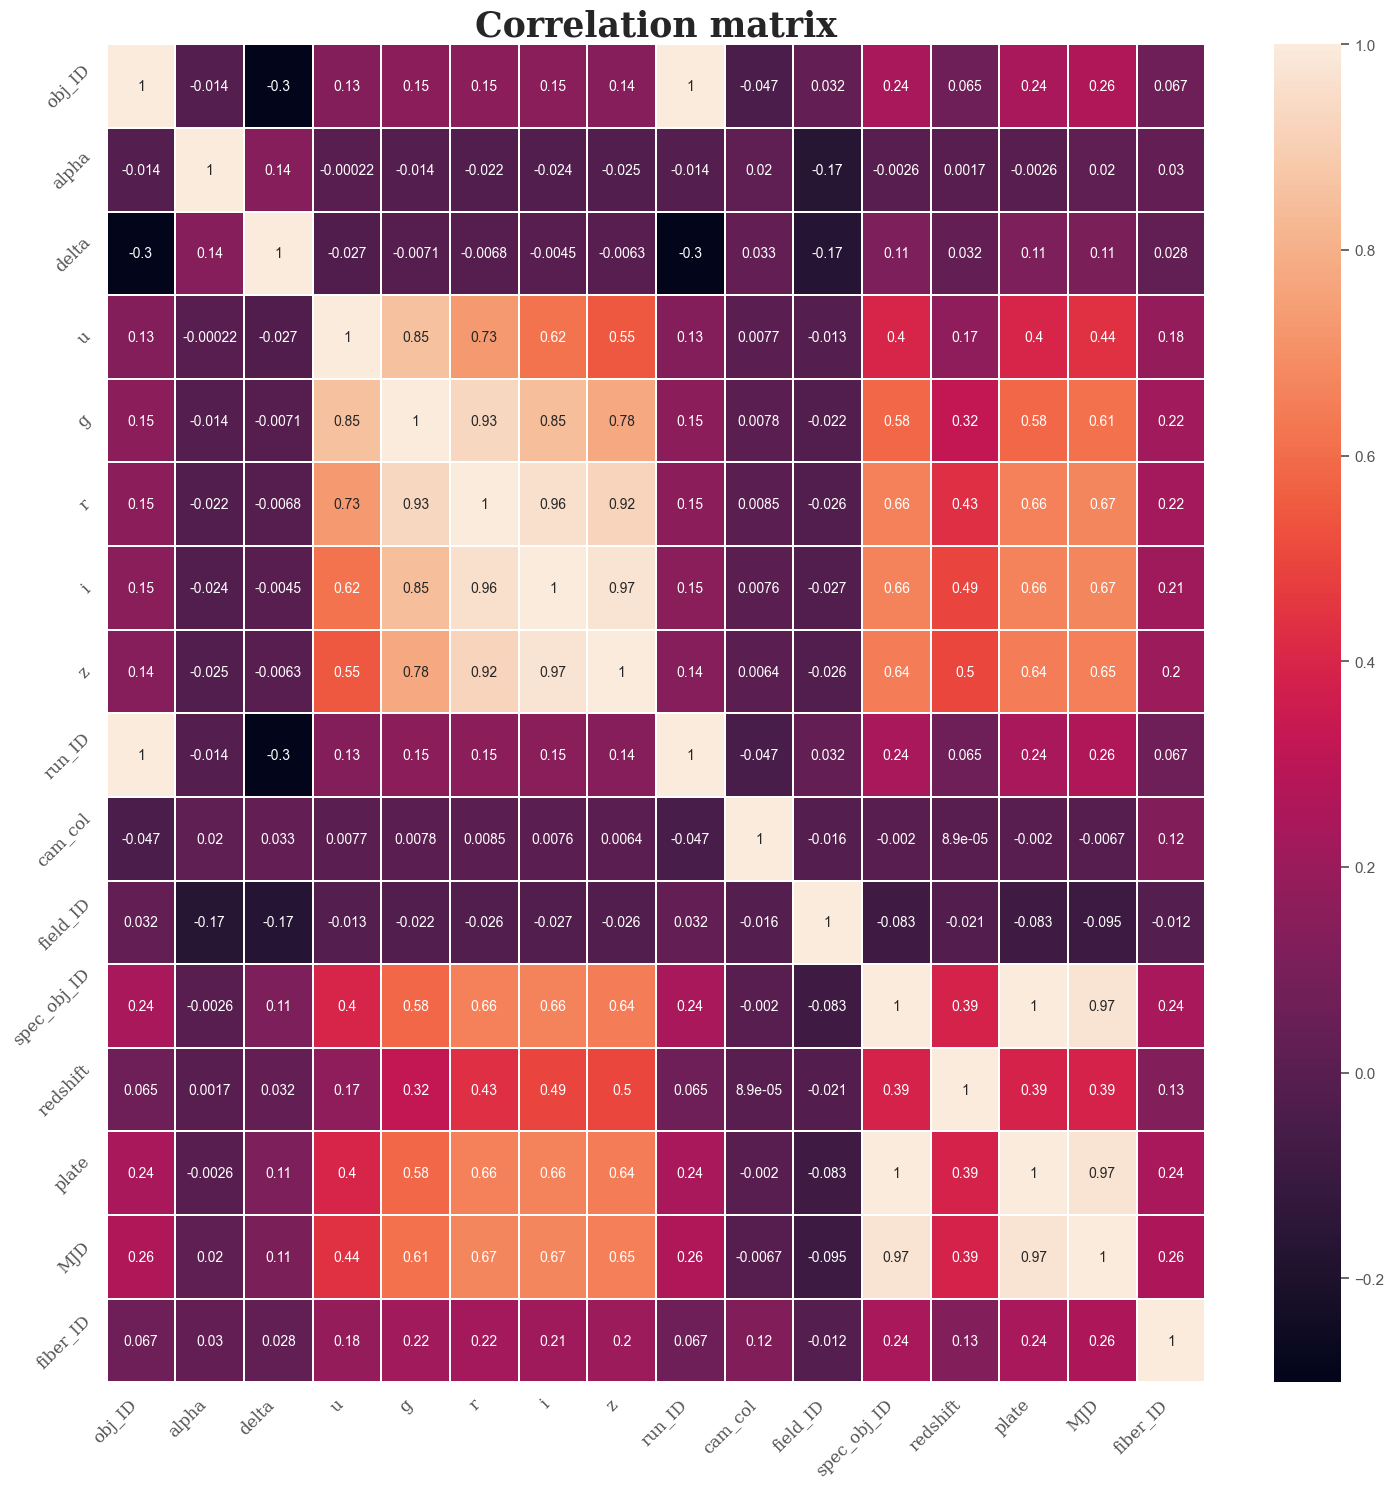

In [27]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=0.1, linecolor='white')
plt.title('Correlation matrix', fontsize=25, fontfamily='serif', fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12, fontfamily='serif')
plt.yticks(rotation=45, ha='right', fontsize=12, fontfamily='serif')
plt.tight_layout()
plt.show()

Conajmniej 2-3 zmienne można usunąć bo są skorelowane w 100% z innymi

### PCA

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df.drop(columns=['class'])
X = scaler.fit_transform(X)
pca = PCA()
pca.fit(X)

PCA()

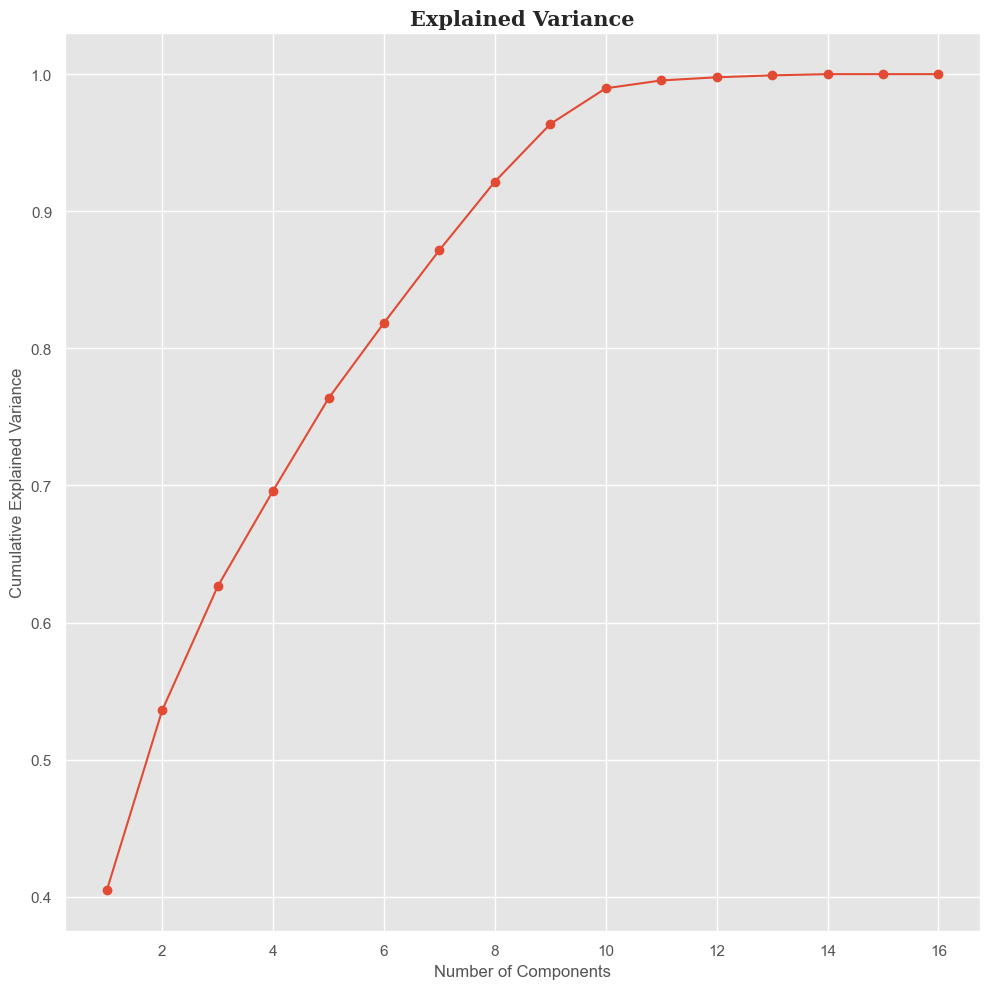

In [29]:
plt.figure(figsize=(10, 10))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Explained Variance', fontsize=15, fontfamily='serif', fontweight='bold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.tight_layout()
plt.show()

In [30]:
import plotly.express as px

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['pca1', 'pca2', 'pca3'])
df_pca['class'] = df['class']
fig = px.scatter_3d(df_pca, x='pca1', y='pca2', z='pca3', color='class', opacity=0.7)
fig.show()

ModuleNotFoundError: No module named 'plotly'

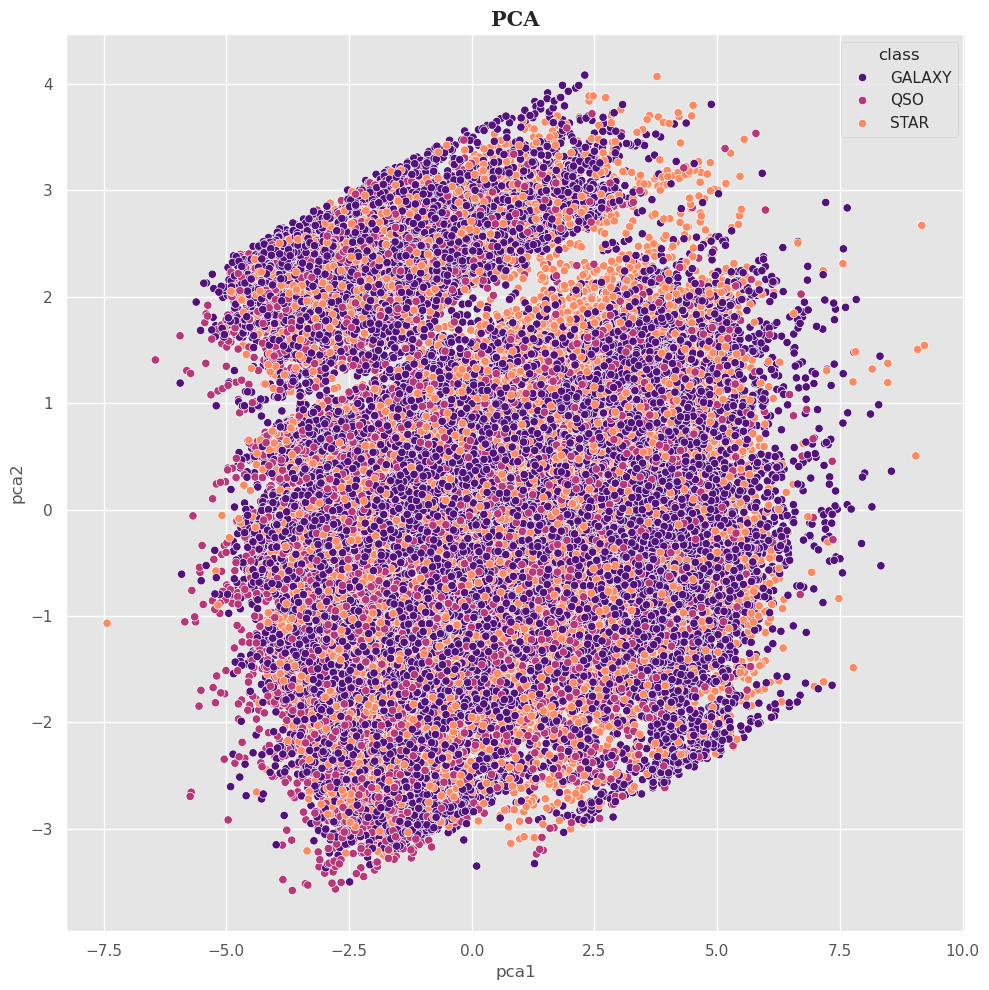

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['pca1', 'pca2'])
df_pca['class'] = df['class']
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_pca, x='pca1', y='pca2', hue='class', palette='magma')
plt.title('PCA', fontsize=15, fontfamily='serif', fontweight='bold')
plt.tight_layout()
plt.show()

2 dimensions is definitely not enough xd